In [1]:
import pretty_midi
import os

In [23]:
def remove_count_in(midi_data: pretty_midi.PrettyMIDI):
    offset = midi_data.get_downbeats()[1]
    for instr in midi_data.instruments:
        instr: pretty_midi.Instrument
        if instr.name == "Click":
            midi_data.instruments.remove(instr)
            continue
        for note in instr.notes:
            note: pretty_midi.Note
            note.start -= offset
            note.end -= offset
        for cc in instr.control_changes:
            cc: pretty_midi.ControlChange
            cc.time -= offset

    return midi_data

In [24]:
count_in_midi_dir = "../input_midi/irealpro_midi_count_in/"
output_midi_dir = "../input_midi/irealpro_midi/"

for file_name in sorted(os.listdir(count_in_midi_dir)):
    if file_name == ".DS_Store":
        continue
    print(file_name)
    midi_data = pretty_midi.PrettyMIDI(count_in_midi_dir+file_name)
    remove_count_in(midi_data).write(output_midi_dir+file_name)
    

502 Blues.mid


/usr/local/lib/python3.10/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


52nd Street Theme.mid
9.20 Special.mid
A Beautiful Friendship.mid
A Certain Smile.mid
A Child Is Born.mid
A Fine Romance.mid
A Foggy Day.mid
A Kiss To Build A Dream On.mid
A Pretty Girl Is Like A Melody.mid
A Sleepin' Bee.mid
A Taste Of Honey.mid
A Tisket A Tasket.mid
A Weaver Of Dreams.mid
Ac-Cent-Tchu-Ate The Positive.mid
Across The Alley From The Alamo.mid
Afro Blue.mid
Afternoon In Paris.mid
Ain't Misbehavin'.mid
Alexander's Ragtime Band.mid
Alfie's Theme.mid
Alice In Wonderland.mid
All Alone.mid
All Blues.mid
All By Myself.mid
All Of Me.mid
All Of You.mid
All Through The Day.mid
All Through The Night.mid
Almost Like Being In Love.mid
Alone Together.mid
Along Came Betty.mid
Always.mid
Am I Blue_.mid
And The Angels Sing.mid
Anything Goes.mid
April In Paris.mid
Aren't You Glad You're You.mid
As Long As I Live.mid
At Last.mid
At Long Last Love.mid
Autumn Leaves.mid
Ba-lue Bolivar Ba-lues-are.mid
Backstage Sally.mid
Bags and Trane.mid
Bags' Groove.mid
Barbara.mid
Baubles, Bangles and B

In [3]:
len(os.listdir("../input_midi/irealpro_midi/"))

273

In [19]:
midi_data = pretty_midi.PrettyMIDI("../input_midi/irealpro_midi/"+"9.20 Special.mid")

/usr/local/lib/python3.10/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


In [5]:
midi_data.get_downbeats()[1]

2.4

In [6]:
midi_data.instruments

[Instrument(program=0, is_drum=False, name="Piano"),
 Instrument(program=32, is_drum=False, name="Bass"),
 Instrument(program=0, is_drum=True, name="Drums"),
 Instrument(program=116, is_drum=False, name="Click")]

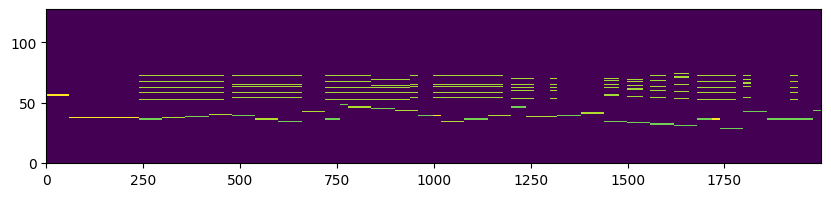

In [20]:
import numpy as np
import matplotlib.pyplot as plt

ground = midi_data.get_piano_roll()[:,:2000]
fig, ax = plt.subplots()
ax.imshow(ground, origin="lower", aspect="auto", interpolation="none")
fig.set_size_inches(10, 2)
# ax.set_yticks(list(range(12)))
# ax.set_yticklabels(["C", "Db", "D", "Eb", "E", "F", "Gb", "G", "Ab", "A", "Bb", "B"])
plt.show()

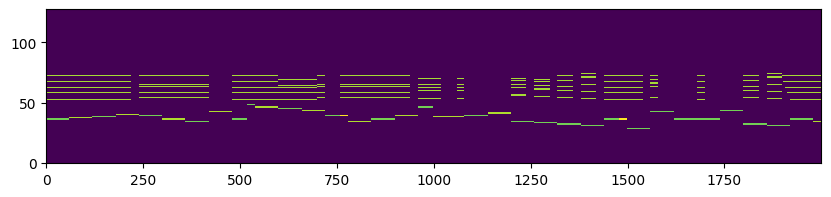

In [21]:
ground = remove_count_in(midi_data).get_piano_roll()[:,:2000]
fig, ax = plt.subplots()
ax.imshow(ground, origin="lower", aspect="auto", interpolation="none")
fig.set_size_inches(10, 2)
# ax.set_yticks(list(range(12)))
# ax.set_yticklabels(["C", "Db", "D", "Eb", "E", "F", "Gb", "G", "Ab", "A", "Bb", "B"])
plt.show()

In [22]:
midi_data.write("cool.mid")